<a href="https://colab.research.google.com/github/ZordoC/Credit-Default/blob/master/ClassImbalanceipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The Basic-Kit 
import pandas as pd 
import numpy as np 
import time 
from IPython.display import display


# Cleaning / pre-processing 



from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
# Vizualizations 


import matplotlib.pyplot as plt 
import seaborn as sns 




# Modelling 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split







 
 <h5>
    <font size = 7 color = 'green'  >  
      
      
  <h1> <center>  Function-Space  </center></ h1>
 
  </font>
  </h5>
  <br>

In [0]:
def correlation(df, threshold):
    df = df.copy(deep=True) # This is very important, if you dont do this you will update the df you passed through the function
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset

    return df

In [0]:
def missing_percentage_data(df):
    
    
    missing_values_count = df.isnull().sum()

    total_cells = np.product(df.shape)
    
    total_missing = missing_values_count.sum()

    missing_percent = (total_missing/total_cells) * 100

    print('Percent of missing data of = {}%'.format(missing_percent))
    
    return 

In [0]:
def near_zero_var(df,tresh):
    df = df.copy(deep=True)
    cols = df._get_numeric_data().columns
    for i in range(len(cols)):
        if df[cols[i]].var() <= tresh :
            del df[cols[i]] 
    
    return df 
    
    

In [0]:
def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')

    # Many fliers, so we loop over them and create a label for each one
    


In [0]:
def X_Y (df,label): # Introduce label in quotes ex: "label"
    
    
    X = df[[i for i in list(df.columns) if i != label  ]]  # attributes
    Y = df[label] # label , we can come here and choose to swap whenever we want 
    
    return X,Y 


In [0]:
url = 'https://raw.githubusercontent.com/ZordoC/Credit-Default/master/data.csv'

df = pd.read_csv(url,header = 1)

In [8]:
display(df.head())

display(df.describe())



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
missing_percentage_data(df)
                        
                        
df.head()      

Percent of missing data of = 0.0%


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
df = df.rename(columns = { 'default payment next month' : 'default_payment' })



df['SEX'] = df.SEX.astype('category')
df['MARRIAGE'] = df.MARRIAGE.astype('category')
df['EDUCATION'] = df.EDUCATION.astype('category')
df['default_payment'] = df.default_payment.astype('category')
df['PAY_0'] = df.PAY_0.astype('category')
df['PAY_2'] = df.PAY_2.astype('category')
df['PAY_3'] = df.PAY_3.astype('category')
df['PAY_4'] = df.PAY_4.astype('category')
df['PAY_5'] = df.PAY_5.astype('category')
df['PAY_6'] = df.PAY_6.astype('category')


#df = df.drop(['ID'], axis = 1 )

numericals =[i for i in df.columns if df.dtypes[i]=='int64']

categoricals = list( ['SEX' , 'EDUCATION' , 'MARRIAGE' , 'default_payment', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6' ] )





In [11]:
for cat in categoricals:
  
  print(df[cat].value_counts())    
  
  
len(df)

print (df['PAY_6'].value_counts())





2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
0    23364
1     6636
Name: default_payment, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58


In [12]:
df = df[(df['MARRIAGE'] == 1) | (df['MARRIAGE'] ==  2)  ]


df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


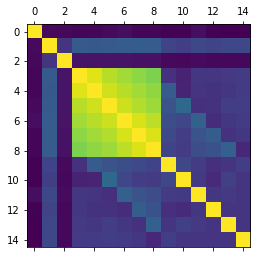

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [12]:
plt.matshow(df[numericals].corr())
plt.show()

df[numericals].head()

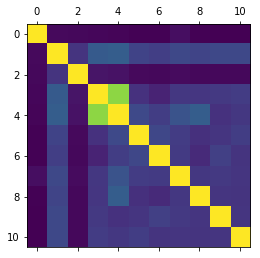

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.000000,0.024858,0.021129,0.019586,0.015950,0.006854,0.005905,0.037669,0.005254,0.000907,0.002181
LIMIT_BAL,0.024858,1.000000,0.152338,0.284431,0.294695,0.202561,0.184466,0.217434,0.206667,0.217260,0.219322
AGE,0.021129,0.152338,1.000000,0.058015,0.051514,0.028193,0.022815,0.031483,0.022176,0.023052,0.021651
BILL_AMT1,0.019586,0.284431,0.058015,1.000000,0.830100,0.144828,0.101181,0.161747,0.160720,0.167622,0.178568
BILL_AMT5,0.015950,0.294695,0.051514,0.830100,1.000000,0.220827,0.183171,0.257113,0.296015,0.143432,0.162989
PAY_AMT1,0.006854,0.202561,0.028193,0.144828,0.220827,1.000000,0.213859,0.180239,0.141027,0.155918,0.181446
PAY_AMT2,0.005905,0.184466,0.022815,0.101181,0.183171,0.213859,1.000000,0.172185,0.119435,0.189641,0.151493
PAY_AMT3,0.037669,0.217434,0.031483,0.161747,0.257113,0.180239,0.172185,1.000000,0.161345,0.166916,0.156559
PAY_AMT4,0.005254,0.206667,0.022176,0.160720,0.296015,0.141027,0.119435,0.161345,1.000000,0.156307,0.151685
PAY_AMT5,0.000907,0.217260,0.023052,0.167622,0.143432,0.155918,0.189641,0.166916,0.156307,1.000000,0.156730


In [13]:
df_n = correlation(df[numericals], .85)

plt.matshow(df_n.corr())
plt.show()

df_n.corr()


In [0]:

cols1 = list(df_n.columns)

In [0]:
categoricals = list( ['SEX' , 'EDUCATION' , 'MARRIAGE' , 'default_payment', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5' ] )


cols =  cols1 + categoricals 

In [16]:
df = df[cols]
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,default_payment,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,1,20000,24,3913,0,0,689,0,0,0,0,2,2,1,1,2,2,-1,-1,-2
1,2,120000,26,2682,3455,0,1000,1000,1000,0,2000,2,2,2,1,-1,2,0,0,0
2,3,90000,34,29239,14948,1518,1500,1000,1000,1000,5000,2,2,2,0,0,0,0,0,0
3,4,50000,37,46990,28959,2000,2019,1200,1100,1069,1000,2,2,1,0,0,0,0,0,0
4,5,50000,57,8617,19146,2000,36681,10000,9000,689,679,1,2,1,0,-1,0,-1,0,0


In [18]:
X,y = X_Y(df,'default_payment')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=27,shuffle=True)

print("train has {} features".format(len(X_train.columns)))

print("test has {} features".format(len(X_test.columns)))




train has 19 features
test has 19 features


In [19]:
len(y_test)

5925

In [20]:


start_time = time.time()

rfc = RandomForestClassifier(n_estimators = 400 , verbose = 2,n_jobs=-1) 


rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")
print("--- Run Time %s mins ---" %np.round(((time.time()-start_time)/60),2))
print("\n")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 2 of 400
building tree 1 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.0s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    8.3s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   18.9s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s


Confusion Matrix
[[4380  867]
 [ 203  475]]


Accuracy is 0.8194092827004219


Kappa is 0.37531703417997964


--- Run Time 0.36 mins ---




[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.5s finished


In [21]:
df.groupby(['default_payment','PAY_0'])['default_payment'].count()

default_payment  PAY_0
0                -2        2376
                 -1        4685
                  0       12678
                  1        2402
                  2         809
                  3          75
                  4          24
                  5          12
                  6           5
                  7           2
                  8           8
1                -2         362
                 -1         944
                  0        1854
                  1        1233
                  2        1825
                  3         240
                  4          52
                  5          13
                  6           6
                  7           7
                  8          11
Name: default_payment, dtype: int64

In [14]:
X,y = X_Y(df,'default_payment')


# Separate input features and target

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_default = X[X.default_payment==0]
default = X[X.default_payment==1]

# upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(not_default), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_default, default_upsampled])

# check new class counts
upsampled.default_payment.value_counts()
    

1    18493
0    18493
Name: default_payment, dtype: int64

In [0]:
y_train = upsampled.default_payment
X_train = upsampled.drop('default_payment', axis=1)

In [17]:
y_test.value_counts()

0    4583
1    1342
Name: default_payment, dtype: int64

In [18]:
start_time = time.time()

rfc = RandomForestClassifier(n_estimators = 400 , verbose = 2,n_jobs=-1) 


rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")
print("--- Run Time %s mins ---" %np.round(((time.time()-start_time)/60),2))
print("\n")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 2 of 400building tree 1 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.0s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   12.9s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   29.3s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   32.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s


Confusion Matrix
[[4306  796]
 [ 277  546]]


Accuracy is 0.8189029535864979


Kappa is 0.4012893112174917


--- Run Time 0.56 mins ---




[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.5s finished


In [19]:

# downsample majority
not_fraud_downsampled = resample(not_default,
                                replace = False, # sample without replacement
                                n_samples = len(default), # match minority n
                                random_state = 42) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, default])

# checking counts
downsampled.default_payment.value_counts()


1    5205
0    5205
Name: default_payment, dtype: int64

In [0]:
y_train = downsampled.default_payment
X_train = downsampled.drop('default_payment', axis=1)

In [21]:
start_time = time.time()

rfc = RandomForestClassifier(n_estimators = 400 , verbose = 2,n_jobs=-1) 


rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")
print("--- Run Time %s mins ---" %np.round(((time.time()-start_time)/60),2))
print("\n")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.8s


building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 55 of 400
building tree 54 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 61 of 400
building tree 60 of 400
building tree 63 of 400building tree 62 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    3.3s


building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    7.5s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    8.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s


Confusion Matrix
[[3593  477]
 [ 990  865]]


Accuracy is 0.7524050632911392


Kappa is 0.37751751811252343


--- Run Time 0.15 mins ---




[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.4s finished


In [0]:
X,y = X_Y(df,'default_payment')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=27,shuffle=True)


In [0]:
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [17]:
display(np.array(np.unique(y_train, return_counts= True)).T)
np.array(np.unique(y_test, return_counts= True)).T

array([[    0, 18493],
       [    1, 18493]])

array([[   0, 4583],
       [   1, 1342]])

In [18]:
start_time = time.time()

rfc = RandomForestClassifier(n_estimators = 400 , verbose = 2,n_jobs=-1) 


rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")
print("--- Run Time %s mins ---" %np.round(((time.time()-start_time)/60),2))
print("\n")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 2 of 400
building tree 1 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.8s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   12.7s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   29.4s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   32.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s


Confusion Matrix
[[4326  817]
 [ 257  525]]


Accuracy is 0.8187341772151899


Kappa is 0.39313712662405165


--- Run Time 0.56 mins ---




[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.5s finished
